In [11]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

warnings.filterwarnings("ignore")
%matplotlib inline


In [5]:
(X_train, y_train),(X_test, y_test) = load_data()
n_train_size = X_train.shape[0]

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (60000, 28, 28)
Training data y shape: (60000,)
--------------------------------------------------
Test data X shape: (10000, 28, 28)
Test data y shape: (10000,)
--------------------------------------------------


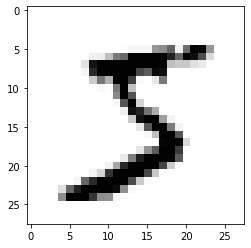

In [7]:
i_image = 0
plt.imshow(X_train[i_image,:,:], cmap="Greys")
plt.show()

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)


In [13]:
y = np.concatenate([y_train, y_test], axis = 0)
y = tf.keras.utils.to_categorical(y,10)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]


In [14]:
drop_prob = 0.5
my_model = Sequential()

#1st convolution + pooling
my_model.add(Conv2D(input_shape=(28,28,1), filters=32, kernel_size=(5,5), padding="same", activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

#2nd convolution + pooling
my_model.add(Conv2D(filters=64, kernel_size=(5,5), padding="same", activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))

#Flattened fully connected layer
my_model.add(Flatten())
my_model.add(Dense(units=1024, activation="relu"))

#Apply dropout
my_model.add(Dropout(rate=drop_prob))

#Output layer
my_model.add(Dense(units=10, activation="softmax"))

In [15]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [16]:
n_epochs = 10
batch_size = 200
learn_rate = 0.001


In [17]:
my_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [18]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1)

Epoch 1/10
240/240 [==============================] - 182s 756ms/step - loss: 0.2189 - accuracy: 0.9323 - val_loss: 0.0553 - val_accuracy: 0.9827
Epoch 2/10
240/240 [==============================] - 161s 669ms/step - loss: 0.0587 - accuracy: 0.9818 - val_loss: 0.0401 - val_accuracy: 0.9879
Epoch 3/10
240/240 [==============================] - 141s 588ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0369 - val_accuracy: 0.9885
Epoch 4/10
240/240 [==============================] - 137s 573ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0357 - val_accuracy: 0.9899
Epoch 5/10
240/240 [==============================] - 138s 576ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0344 - val_accuracy: 0.9900
Epoch 6/10
240/240 [==============================] - 139s 578ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0343 - val_accuracy: 0.9908
Epoch 7/10
240/240 [==============================] - 140s 585ms/step - loss: 0.0175 - accuracy: 0.9939 - val_loss: 0.0299 -

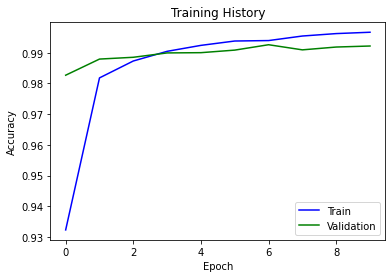

In [21]:
n_skip = 0
plt.plot(my_summary.history["accuracy"][n_skip:], c="b")
plt.plot(my_summary.history["val_accuracy"][n_skip:], c="g")
plt.title("Training History")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")
plt.show()



In [22]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {}".format(np.round(ACC,3)))


Test Accuracy: 0.993
